In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# To create wordcloud image graph - Most Frequent Words
from wordcloud import WordCloud

In [2]:
from sklearn.model_selection import train_test_split
# To count the number of text vectors
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# feature extraction - TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [3]:
review = pd.read_csv('D:\Tensor Flow\Reviews.csv')
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
print(review.shape[0])

568454


In [5]:
review['ProductId'].nunique()

74258

In [6]:
review['UserId'].nunique()

256059

In [7]:
review.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [8]:
# drop the rows with null values
review.dropna(inplace=True)

In [9]:
# recheck if null values are dropped
review.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [10]:
#Thresold value at Score = 3, It returns True & False for value = 3
review = review[review['Score'] != 3]

In [11]:
# np.where() :- conditional operator
# np.where (condition) - true or false :- true first value
# false :- second value 
review['Positivity'] = np.where(review['Score'] > 3, 1, 0)
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


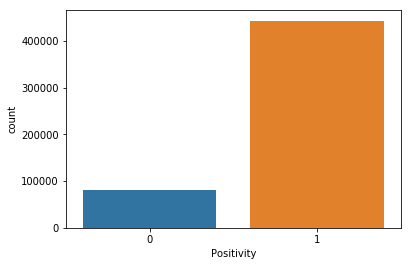

In [12]:
sns.countplot(review['Positivity'])
plt.show()

In [13]:
# axis = 1 : row wise implementation
review = review.drop(['ProductId','UserId','ProfileName','Id',
                      'HelpfulnessNumerator',
                      'HelpfulnessDenominator',
                      'Score','Time',
                      'Summary'], axis=1)
review.head()

,Text,Positivity
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [14]:
# Split the data into train & test
X_train, X_test, y_train, y_test = train_test_split(review['Text'], 
                                                    review['Positivity'], 
                                                    random_state = 0)

In [15]:
vect = CountVectorizer().fit(X_train)
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [16]:
# checking the features
feat = vect.get_feature_names()

In [17]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(feat))

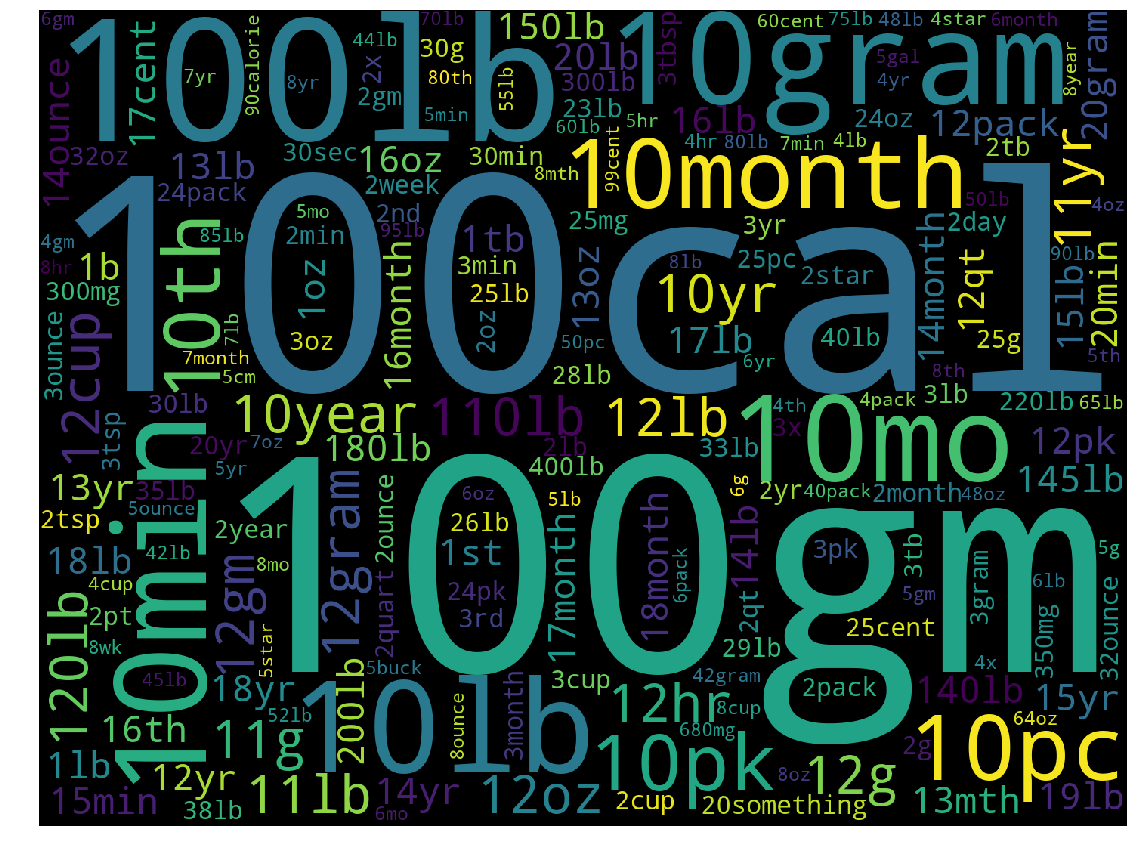

In [18]:
# larger the size of the word, more the times it appears
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

### Sparse Matrix
We now transform the document into a bag-of-words representation i.e matrix form. The result is stored in a sparse matrix i.e it has very few non zero elements.
Rows represent the words in the document while columns represent the words in our training vocabulary.

In [19]:
X_train_vectorized = vect.transform(X_train)

In [20]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
# accuracy :- 
predictions = model.predict(vect.transform(X_test))

In [22]:
accuracy_score(y_test, predictions)

0.9446684519643346

In [23]:
# area under the curve
roc_auc = roc_auc_score(y_test, predictions)
print('AUC: ', roc_auc)
# TPR(True Positive Rate), FPR(False Positive Rate)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
print(fpr)
print(tpr)
print(thresholds)

AUC:  0.8735109525860494
[0.         0.22983733 1.        ]
[0.         0.97685924 1.        ]
[2 1 0]


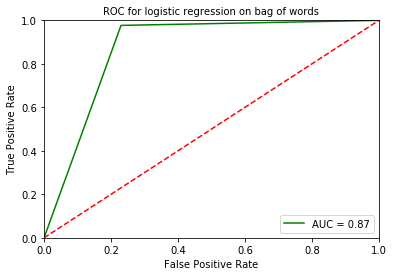

In [24]:
# Receiver Operating Characteristic - ROC
plt.title('ROC for logistic regression on bag of words', fontsize=10)
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 10)
plt.xlabel('False Positive Rate', fontsize = 10)
plt.show()

In [25]:
# let us test our model
new_review = ['The food was not delicious', 'The food was good']
print(model.predict(vect.transform(new_review)))

[1 1]


### Tri-grams
Since our classifier misclassifies things like 'not good', we will use groups of words instead of single words. This method is called n grams (tri-grams for 3 words and so on). Here we take 1, 2 & 3 words into consideration.

In [ ]:
# ngram_range = (1,3) - 1, 1&2, 1,2,3
# CountVectorizer - Transform text data into vectorized text for NLP
vect = CountVectorizer(min_df = 5, ngram_range = (1,3)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names())

In [128]:
feat = vect.get_feature_names()

In [129]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(feat))

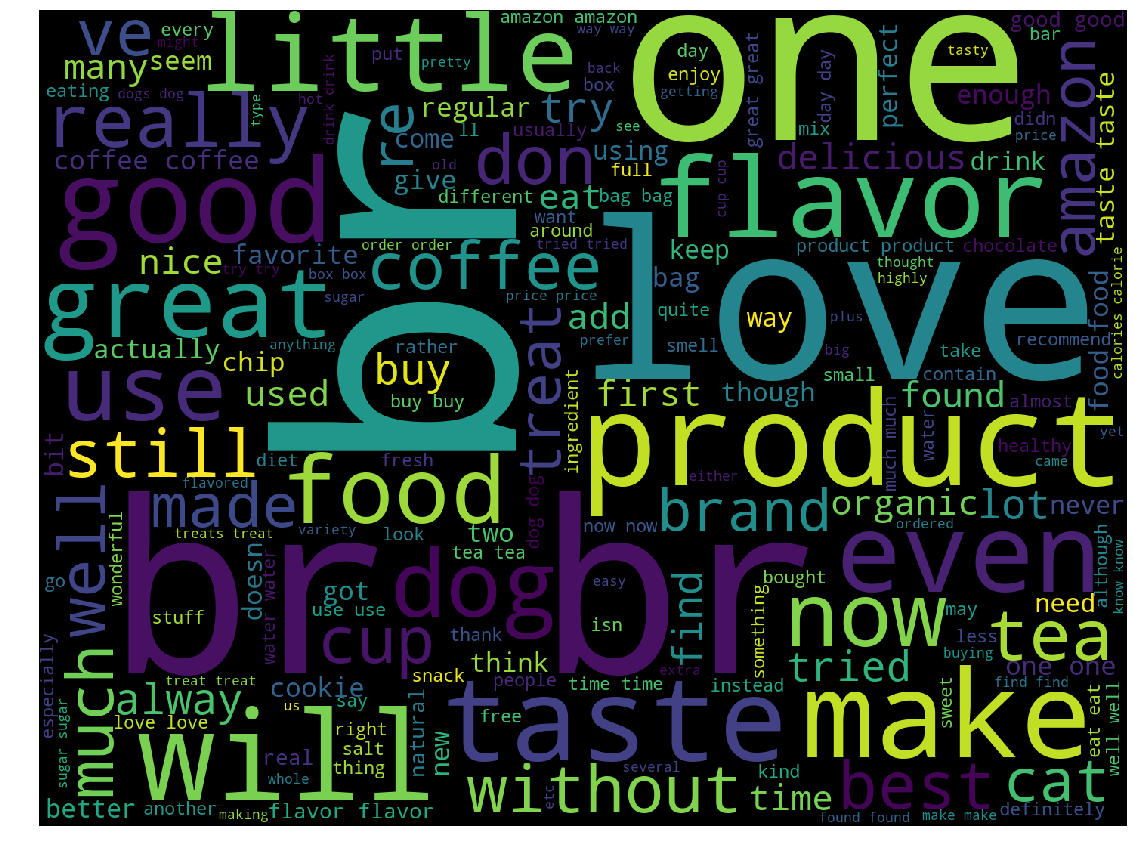

In [131]:
# larger the size of the word, more the times it appears
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [132]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [133]:
predictions = model.predict(vect.transform(X_test))

In [134]:
accuracy_score(y_test, predictions)

0.9698883174583853

In [135]:
roc_auc = roc_auc_score(y_test, predictions)
print('AUC: ', roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)

AUC:  0.9330062586538656


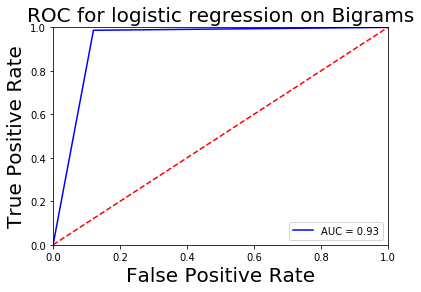

In [136]:
plt.title('ROC for logistic regression on Bigrams', fontsize=20)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.show()

In [137]:
new_review = ['The food is not bad']
print(model.predict(vect.transform(new_review)))

[1]


In [138]:
new_review = ['The good is good but the ambiance is not']
print(model.predict(vect.transform(new_review)))

[1]


In [139]:
new_review = ['The taste of food is good. Must Try']
print(model.predict(vect.transform(new_review)))

[1]


In [140]:
new_review = ['I would feel sorry for anyone eating here']
print(model.predict(vect.transform(new_review)))

[1]
